Imports


In [88]:
import matplotlib.pyplot as plt
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
# ML
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import precision_score , recall_score

Loading data


In [89]:

# data already comes splitted into training and testing
# x is the input and y is the classification
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Normalize values to range [0, 1]
x_train = x_train/ 255.0
x_test = x_test / 255.0
# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


Creating model


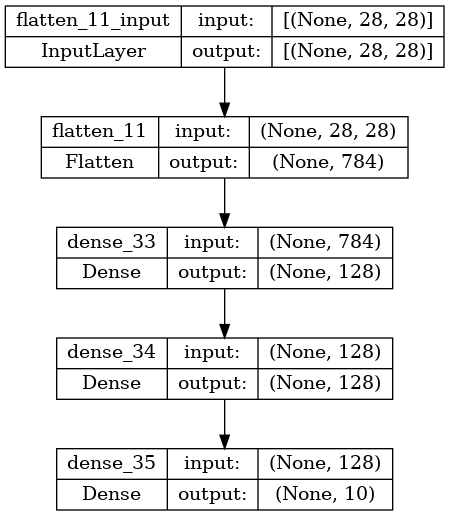

In [90]:

model = keras.Sequential([
    # Flattens the input (creates a flat layer)
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

tf.keras.utils.plot_model(model, 'default.png', show_shapes=True)

Training the model

In [91]:
# We compile the model using
# The stochastic gradient descent optimization algorithm Adam
# Sparse categorical crossentropy as our loss function

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model in 10 epochs and separating 20% for validation
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)
model.save('default.model')

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2562 - accuracy: 0.9244 - val_loss: 0.1311 - val_accuracy: 0.9613
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1072 - accuracy: 0.9670 - val_loss: 0.1022 - val_accuracy: 0.9696
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0747 - accuracy: 0.9775 - val_loss: 0.1035 - val_accuracy: 0.9698
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0550 - accuracy: 0.9830 - val_loss: 0.0960 - val_accuracy: 0.9731
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0432 - accuracy: 0.9861 - val_loss: 0.0929 - val_accuracy: 0.9744
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0342 - accuracy: 0.9893 - val_loss: 0.0984 - val_accuracy: 0.9739
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0296 - accuracy: 0.9900 - val_loss: 0.0922 - val_accuracy:

INFO:tensorflow:Assets written to: default.model/assets


INFO:tensorflow:Assets written to: default.model/assets


Evaluate model

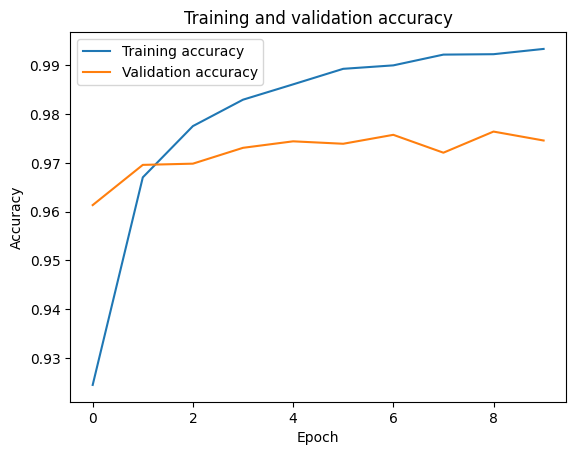

In [92]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [93]:
# Evaluate model on test data
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)

313/313 [==============================] - 0s 995us/step
Precision: 0.9766243698571622
Recall: 0.9765


Changing activation function

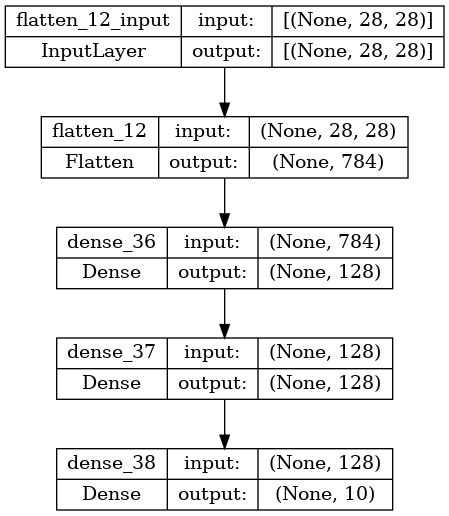

In [94]:
model = keras.Sequential([
    # Flattens the input (creates a flat layer)
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(num_classes, activation='softmax')
])

tf.keras.utils.plot_model(model, 'sigmoid.png', show_shapes=True)

In [95]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model in 10 epochs and separating 20% for validation
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)
model.save('sigmoid.model')

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4806 - accuracy: 0.8733 - val_loss: 0.2343 - val_accuracy: 0.9304
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1943 - accuracy: 0.9417 - val_loss: 0.1626 - val_accuracy: 0.9523
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1359 - accuracy: 0.9596 - val_loss: 0.1321 - val_accuracy: 0.9602
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1024 - accuracy: 0.9696 - val_loss: 0.1137 - val_accuracy: 0.9663
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0807 - accuracy: 0.9760 - val_loss: 0.0980 - val_accuracy: 0.9710
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0622 - accuracy: 0.9812 - val_loss: 0.0988 - val_accuracy: 0.9707
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0514 - accuracy: 0.9847 - val_loss: 0.0908 - val_accuracy:

INFO:tensorflow:Assets written to: sigmoid.model/assets


INFO:tensorflow:Assets written to: sigmoid.model/assets


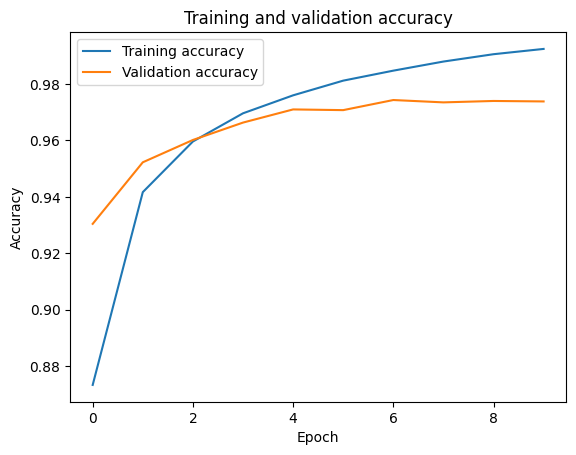

313/313 [==============================] - 0s 1ms/step
Precision: 0.9747580488511427
Recall: 0.9747


In [96]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Evaluate model on test data
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)

Decreasing neuron count

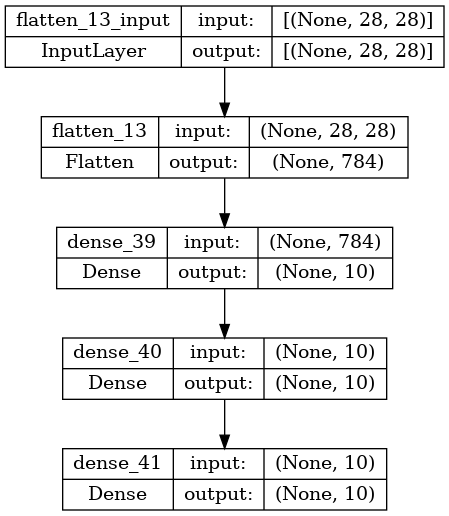

In [97]:
model = keras.Sequential([
    # Flattens the input (creates a flat layer)
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

tf.keras.utils.plot_model(model, 'neuron.png', show_shapes=True)

In [98]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model in 10 epochs and separating 20% for validation
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)
model.save('neuron.model')

Epoch 1/10
1500/1500 [==============================] - 3s 1ms/step - loss: 0.6841 - accuracy: 0.7857 - val_loss: 0.3320 - val_accuracy: 0.9013
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3038 - accuracy: 0.9112 - val_loss: 0.2645 - val_accuracy: 0.9239
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2608 - accuracy: 0.9223 - val_loss: 0.2477 - val_accuracy: 0.9281
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2404 - accuracy: 0.9282 - val_loss: 0.2354 - val_accuracy: 0.9298
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2260 - accuracy: 0.9335 - val_loss: 0.2375 - val_accuracy: 0.9330
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2160 - accuracy: 0.9356 - val_loss: 0.2233 - val_accuracy: 0.9362
Epoch 7/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2069 - accuracy: 0.9392 - val_loss: 0.2257 - val_accuracy:

INFO:tensorflow:Assets written to: neuron.model/assets


INFO:tensorflow:Assets written to: neuron.model/assets


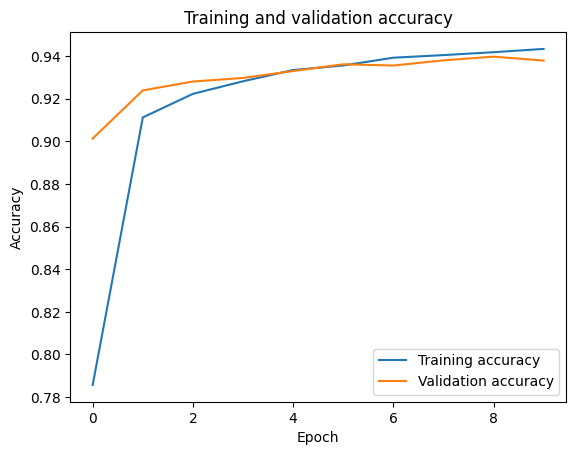

313/313 [==============================] - 0s 693us/step
Precision: 0.9362518947321332
Recall: 0.9358


In [99]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Evaluate model on test data
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)

Changing optimizer

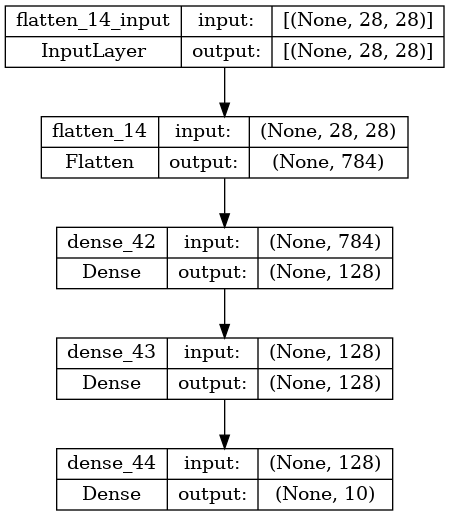

In [100]:
model = keras.Sequential([
    # Flattens the input (creates a flat layer)
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

tf.keras.utils.plot_model(model, 'sgd.png', show_shapes=True)

In [101]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# Train the model in 10 epochs and separating 20% for validation
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)
model.save('sgd.model')

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7225 - accuracy: 0.8081 - val_loss: 0.3367 - val_accuracy: 0.9062
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3188 - accuracy: 0.9081 - val_loss: 0.2738 - val_accuracy: 0.9226
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2653 - accuracy: 0.9237 - val_loss: 0.2355 - val_accuracy: 0.9322
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2312 - accuracy: 0.9338 - val_loss: 0.2115 - val_accuracy: 0.9399
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2054 - accuracy: 0.9407 - val_loss: 0.1950 - val_accuracy: 0.9457
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1844 - accuracy: 0.9473 - val_loss: 0.1769 - val_accuracy: 0.9510
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1670 - accuracy: 0.9514 - val_loss: 0.1674 - val_accuracy:

INFO:tensorflow:Assets written to: sgd.model/assets


INFO:tensorflow:Assets written to: sgd.model/assets


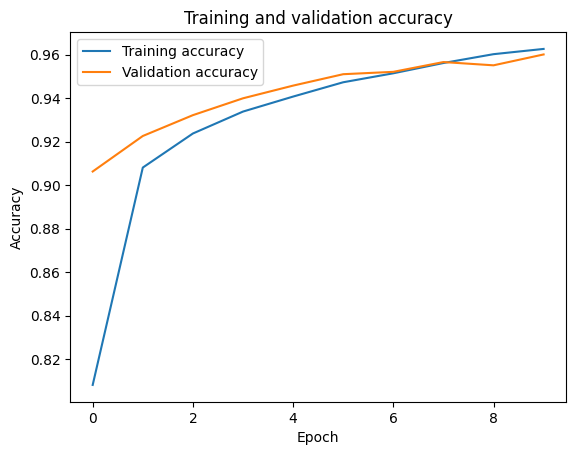

313/313 [==============================] - 0s 1ms/step
Precision: 0.9584299950411304
Recall: 0.9584


In [102]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Evaluate model on test data
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
